In [1]:
import pandas as pd

df = pd.read_csv('data.csv')

In [2]:
df.head()

,match_id,radiant_adv_nw,radiant_adv_xp,radiant_adv_lh,radiant_win
0,0,707,1238,-39,True
1,1,-193,-1224,9,False
2,2,1035,1470,36,False
3,3,2464,2822,-7,False
4,4,6967,5261,150,True


radiant_adv_nw -> radiant networth advantage

radiant_adv_xp -> radiant xp advantage 

radiant_adv_lh -> radiant last-hits advantage

In [3]:
features = ['radiant networth advantage', 'radiant xp advantage', 'radiant last-hits advantage']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48591 entries, 0 to 48590
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   match_id        48591 non-null  int64
 1   radiant_adv_nw  48591 non-null  int64
 2   radiant_adv_xp  48591 non-null  int64
 3   radiant_adv_lh  48591 non-null  int64
 4   radiant_win     48591 non-null  bool 
dtypes: bool(1), int64(4)
memory usage: 1.5 MB


In [5]:
df.describe()

,match_id,radiant_adv_nw,radiant_adv_xp,radiant_adv_lh
count,48591.000000,48591.000000,48591.000000,48591.000000
mean,24985.900146,212.154535,65.618242,0.570661
std,14437.276318,4465.031571,4232.517767,51.383299
min,0.000000,-38183.000000,-20748.000000,-246.000000
25%,12488.500000,-2478.000000,-2668.500000,-33.000000
50%,24976.000000,207.000000,55.000000,0.000000
75%,37479.500000,2868.000000,2778.500000,35.000000
max,49999.000000,36601.000000,21071.000000,257.000000


## EDA

In [10]:
# Radiant winrate
radiant_wr = (len(df[df.radiant_win==True]) / len(df)) * 100

# Dire winrate 
dire_wr = (len(df[df.radiant_win==False]) / len(df)) * 100

print(f"radiant winrate: {round(radiant_wr, 2)}%")
print(f'dire winrate: {round(dire_wr, 2)}%')


radiant winrate: 51.9%
dire winrate: 48.1%


In [7]:
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

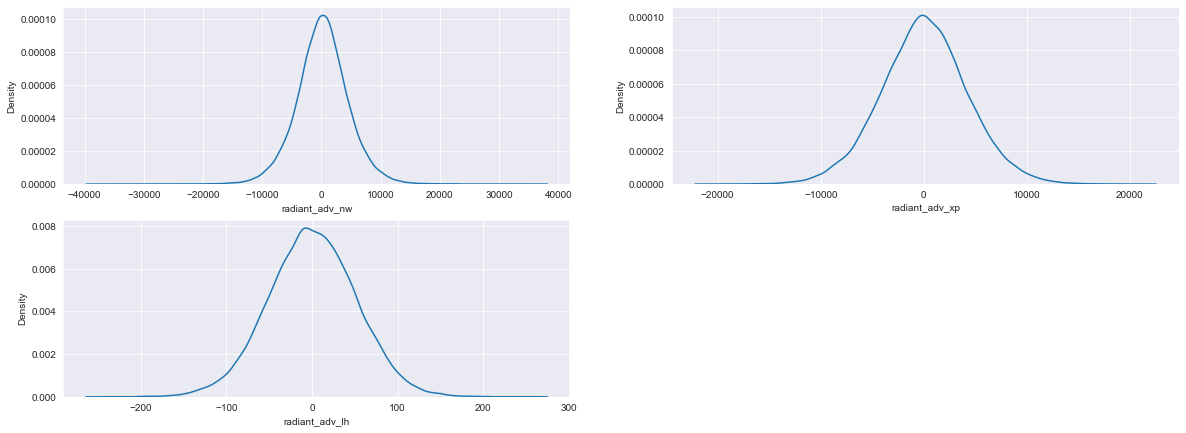

In [8]:
# Probability density function of predictor variables
i=1
plt.figure(figsize=(20,15))
for col in df.columns[1:4]:
    plt.subplot(4,2,i)
    sns.kdeplot(df[col])
    i+=1

The distributions seem to follow a bell curve shape centered around 0.

<AxesSubplot:>

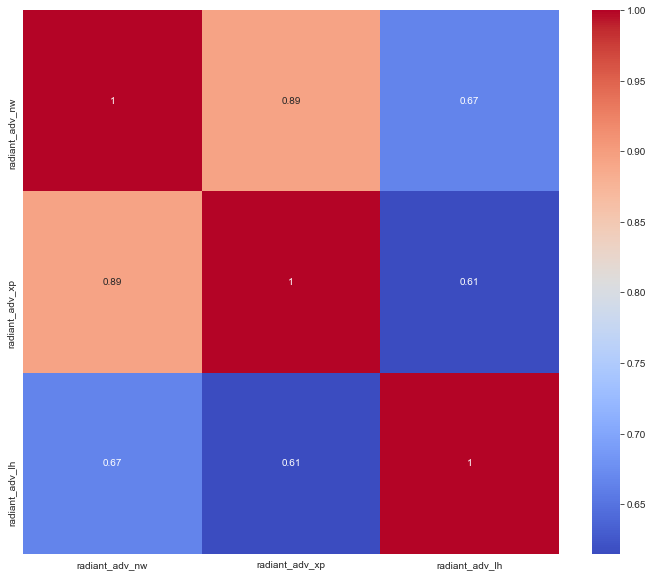

In [9]:
ft_df = df.iloc[:,1:4]
plt.figure(figsize=(12,10))
sns.heatmap(ft_df.corr(), annot=True, cmap='coolwarm')

The plot above displays the standard correlation strength of pairwise comparisons of independent variables. From the plot above, we see that networth and xp advantage correlate strongly positively with 0.89. While co-predictor pair: last hit and networth only show moderate strength in correlation with 0.67. 